In [3]:
import pandas as pd

df = pd.read_parquet("data_02_00.parquet")

In [4]:
df['Participant type'].value_counts(dropna=False)

Participant type
Kierujący    6906269
Pieszy        127129
Pasażer       102908
Osoba UWR        878
Nieznane          33
Name: count, dtype: int64

In [7]:
df['Participant type'] = df['Participant type'].map({
    'Kierujący': 'Driver',
    'Pieszy': 'Pedestrian',
    'Pasażer': 'Passenger',
    'Osoba UWR': 'Person using mobility device',
    'Nieznane': 'Unknown'
})

In [11]:
pd.crosstab(df['Participant type'], df['Injury severity'], normalize='index')

Injury severity,Killed on scene,Killed within 30 days,Seriously injured,Slightly injured,Uninjured
Participant type,,,,,
Driver,0.001668,0.000608,0.007332,0.016817,0.973574
Passenger,0.035420,0.014042,0.223744,0.635888,0.090906
Pedestrian,0.029395,0.020475,0.168498,0.263724,0.517907
Person using mobility device,0.000000,0.001139,0.043280,0.099089,0.856492
Unknown,0.000000,0.000000,0.000000,0.000000,1.000000


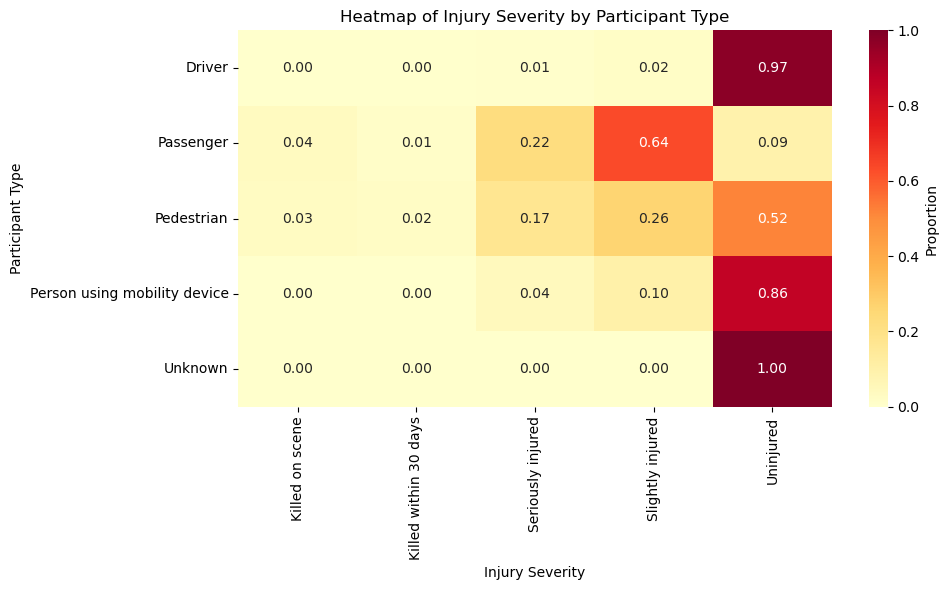

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tabulation with normalized values per participant type (rows sum to 1)
df_crosstab = pd.crosstab(df['Participant type'], df['Injury severity'], normalize='index')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_crosstab, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Proportion'})
plt.title('Heatmap of Injury Severity by Participant Type')
plt.xlabel('Injury Severity')
plt.ylabel('Participant Type')
plt.tight_layout()
plt.show()


In [23]:
# Save the dataset with the translated 'Participant type' column
df.to_parquet("data_02_02.parquet", index=False)